<h1 style="font-size: 48px;">Project: Investigate a Dataset - "FBI NICS Firearm Background Check & U.S. Census Data"</h1>
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
<h1 style="font-size: 35px;"><strong>Introduction</strong></h1>

## Dataset Description
### FBI NICS (National Instant Criminal Background Check System) Data
> Firearm background checks are a key indicator of gun-related activity in the U.S., often used as a proxy for gun sales. In this project, I explore which states have the highest and lowest background check volumes and how those trends relate to population differences.

> By analyzing FBI background check data alongside U.S. Census population estimates, I aim to uncover patterns across states and see whether higher activity is driven by population growth or other factors, such as policy or cultural differences. This project serves as an opportunity to apply data wrangling, visualization, and interpretation skills to a real-world public dataset.
### Key Columns in the NICS Data:

- **`month`** – The month and year of the background checks. (YYYY-MM)
- **`state`** – The U.S. state where the checks were conducted.
- **`permit`** – Number of background checks for firearm permits.
- **`permit_recheck`** – Rechecks of existing firearm permits.
- **`handgun`** – Background checks specifically for handgun purchases.
- **`long_gun`** – Background checks for long guns (rifles, shotguns, etc.).
- **`other`** – Other firearm-related background checks.
- **`multiple`** – Checks for multiple firearm purchases in a single transaction.
- **`admin`** – Administrative-related checks.
- **`private_sale_handgun`** – Background checks for private sales of handguns.
- **`private_sale_long_gun`** – Background checks for private sales of long guns.
- **`return_to_seller_handgun`** – Checks for firearms returned to sellers.
- **`return_to_seller_long_gun`** – Checks for long guns returned to sellers.
- **`totals`** – The total number of background checks conducted for that month and state.

## Primary Research Question:
> ### **Which states have the highest and lowest firearm background check volumes, and how do these trends relate to population changes?**

## Key Focus Areas: 
<ul> <li><strong>High vs. Low Activity States:</strong><br> Identify the top five and bottom five states based on cumulative background check volumes. This comparison helps spotlight outliers and regional variations in firearm-related activity.</li>

<li><strong>Population Growth vs. Background Checks:</strong><br>
Compare annual background check trends against population changes using U.S. Census data. This helps determine whether rising firearm activity in certain states is driven by population growth or other factors.</li>

</ul>


<a id='wrangling'></a>
<h1 style="font-size: 35px;"><strong>Data Wrangling</strong></h1>

### Data Assessing

In [67]:
# Import Packages

import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Import Data

gd = pd.read_excel('gun-data.xlsx')
cd = pd.read_csv('u.s.-census-data.csv')

In [69]:
# read dataset 

gd.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [70]:
cd.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [71]:
gd.info()
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [72]:
gd.describe(include='all')

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485,12485,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
unique,227,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-09,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,55,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,NaN,NaN,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,NaN,NaN,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,NaN,NaN,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000


#### Check for any missing values and if so, what are the missing values and how many?

In [73]:
gd.isnull().values.any()

True

In [74]:
cd.isnull().values.any()

True

In [75]:
gd.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [76]:
cd.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [77]:
gd.isnull().sum().sum()

154595

In [78]:
cd.isnull().sum().sum()

1062

#### Now check if there are any duplicates. If so, how many and what are the duplicates?

In [79]:
gd.duplicated().any()

False

In [80]:
cd.duplicated().any()

True

In [81]:
cd[cd.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cd.duplicated().sum()

3

# Data Cleaning

In [83]:
gd.fillna(0, inplace=True)
cd.fillna(0, inplace=True)

In [84]:
cd = cd.drop_duplicates()

#### Double check if there are still any missing values or duplicates.

In [85]:
gd.isnull().sum().sum()

0

In [86]:
cd.isnull().sum().sum()

0

In [87]:
cd.duplicated().sum()

0

<a id='eda'></a>
<h1 style="font-size: 35px;"><strong>Exploratory Data Analysis</strong></h1>

## To begin the analysis, I will evaluate the total number of background checks conducted annually across each state.

In [88]:
# Extract all States to a list

state_list = gd['state'].tolist()
len(state_list)

12485

In [89]:
# Remove US territories to include only 50 States and remove duplicates

states_to_remove = ['Mariana Islands', 'District of Columbia', 'Puerto Rico', 'Virgin Islands', 'District of Columbia', 'Guam']
state_list = gd.loc[~gd['state'].isin(states_to_remove), 'state'].drop_duplicates().tolist()
len(state_list)

50

In [90]:
# Extract the Year from the Month column

gd['year'] = pd.to_datetime(gd['month']).dt.year

In [91]:
# Group by State and Year to see Totals

yearly_totals = gd[gd['state'].isin(state_list)].groupby(['state', 'year'])['totals'].sum().reset_index()

In [92]:
# Reshape data to show total background checks by state and year.

pivot_table = yearly_totals.pivot(index='state', columns='year', values='totals')
pivot_table = pivot_table.fillna(0) #Fills any missing values with zero
pivot_table = pivot_table.rename_axis(None, index =0) #This code and below removes the axis label for a cleaner presentation
pivot_table.columns.name = None 
pivot_table

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Alabama,36568,246756,221911,230187,221008,225479,229997,235873,243176,245355,299432,317868,308607,336102,431356,563880,621305,737509,616947,336763
Alaska,3985,43073,39959,39959,36793,37059,40504,44514,47037,49604,61729,60780,65909,70198,85342,93405,87623,85621,87647,56902
Arizona,17453,173548,148263,147582,142260,145719,155719,176649,204178,192071,208721,215379,206050,251477,339663,363036,310672,331442,416279,279553
Arkansas,21752,184616,169628,166062,153424,150249,158366,164001,170129,169824,191799,209842,191448,206228,246193,279736,234282,257346,266014,161694
California,67445,883144,794506,854569,684390,524431,548843,611022,617820,855943,780398,788164,816399,905701,1132603,1368295,1474616,1761079,2377167,1167528
Colorado,23798,257308,307512,348696,183754,181257,194191,206287,214749,221737,285521,313641,300820,336296,414838,514658,413284,454062,540514,345559
Connecticut,6870,87209,87586,89689,93598,100567,100916,97599,97616,116112,155885,202454,179595,186068,237496,294338,270297,307750,317692,138789
Delaware,2135,17594,15347,16619,16388,16361,16424,17121,16698,15912,18102,20530,19240,22490,30724,40062,42950,50416,59430,36826
Florida,32341,279700,266035,303396,288848,298181,318024,370645,411728,426180,503672,556540,559347,643229,834319,1073859,1034546,1147082,1435340,912765
Georgia,3819,409810,352357,325521,285201,282218,232203,257815,311901,270468,367374,373237,333247,367894,465560,527885,484580,566946,612985,378921


# Following the evaluation of annual background check totals by state, I will conduct a comparative analysis of the top five and bottom five states. Why?
 - #### **`Highlight Extremes`** for impact seeing which states have the **highest vs lowest background checks** immediately draws attention to outliers.
 - #### **`Context for Regional or Policy Analysis`**. **Top States** might correlate with high population, gun ownership culture, or state-specific laws while **bottom states** might show low demand, stricter laws, or lower population density.
 - #### Are the same states always at the top or bottom across multiple years?

In [93]:
state_totals = pivot_table.sum(axis=1)

In [94]:
top_5 = state_totals.sort_values(ascending=False).head(5)
bottom_5 = state_totals.sort_values().head(5)

In [95]:
extreme_states = pd.concat([top_5, bottom_5]).index.tolist()
extreme_pivot = pivot_table.loc[extreme_states]
extreme_pivot

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Kentucky,31869,248212,229896,238996,229423,226869,234974,232589,791599,1587850,1881101,2189578,2385579,2280832,2589358,1578331,2492184,3218371,3676847,3417976
Texas,82399,710025,662970,672746,664745,688275,672995,738793,770236,783596,944568,1014015,968071,1155387,1436132,1633278,1465992,1574266,1721726,1074971
California,67445,883144,794506,854569,684390,524431,548843,611022,617820,855943,780398,788164,816399,905701,1132603,1368295,1474616,1761079,2377167,1167528
Illinois,41477,484848,449771,462702,446138,515917,590417,527134,527698,536975,615941,752071,695300,828962,1036061,1280613,1344096,1247398,1924070,1163945
Pennsylvania,48317,541555,481294,509881,567702,515896,504813,482977,520454,562603,598544,641696,626677,718934,968534,1044731,899241,993429,1143220,763378
Hawaii,431,5343,6609,7464,7807,7439,7298,7575,7588,6521,8569,10511,10533,12635,17428,17416,15225,15290,16681,9217
Rhode Island,1059,10677,9414,10233,9521,9660,10054,9649,9936,10222,12405,14799,14835,17271,24050,26666,20400,22129,27758,18132
Vermont,2116,22218,20300,20657,20483,19971,19490,18607,20713,19951,21991,23085,24276,27292,34507,36135,31502,34588,39417,27148
Delaware,2135,17594,15347,16619,16388,16361,16424,17121,16698,15912,18102,20530,19240,22490,30724,40062,42950,50416,59430,36826
Wyoming,3486,35476,34295,34454,33585,33184,35427,37911,42376,42770,49255,51395,47709,52224,63356,70671,63063,62339,63594,37736


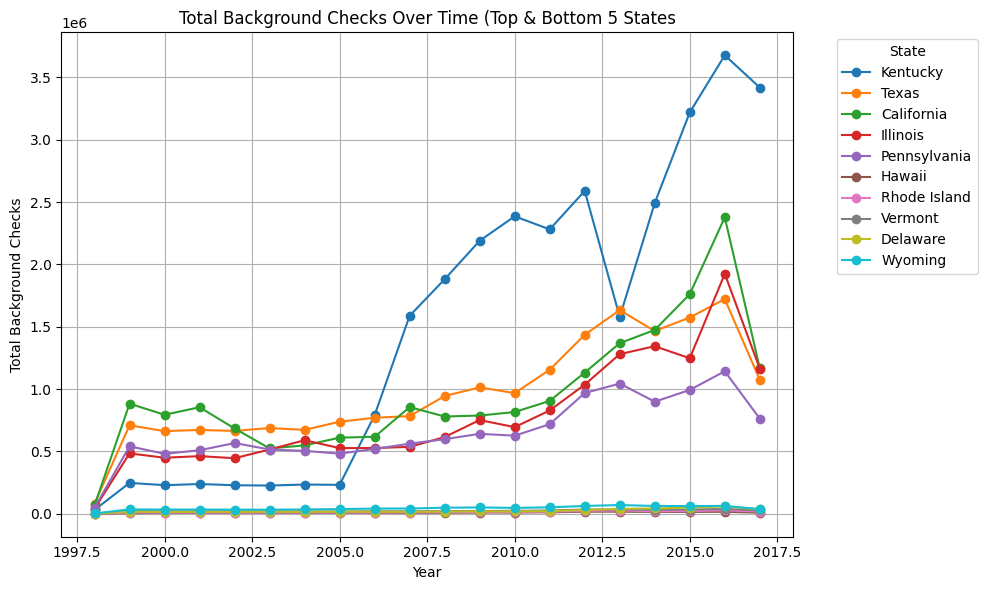

In [96]:
extreme_pivot.T.plot(figsize=(10,6), marker='o')
plt.title("Total Background Checks Over Time (Top & Bottom 5 States")
plt.xlabel("Year")
plt.ylabel("Total Background Checks")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

#### The data reveals that the bottom five states have consistently remained at the lower end of total background checks, showing minimal fluctuation over time. In contrast, Kentucky exhibited a significant upward trend. While initially ranking below states like Texas, California, Illinois, and Pennsylvania, Kentucky experienced a sharp surge in background checks between 2005–2007, followed by another notable increase from 2013 to 2016. This raises an important analytical question:
### What underlying factors or policy changes contributed to these spikes in activity?

### Checking population growth trend per year

In [97]:
# Filter rows related to population

population_rows = cd[cd['Fact'].str.contains("Population", na=False)]

In [98]:
# Extracting 2010 population values
top5_states = ['Kentucky', 'Texas', 'California', 'Illinois', 'Pennsylvania']
pop_2010 = {
    state: int(population_rows.loc[
               population_rows['Fact'] == 'Population, Census, April 1, 2010', state].values[0].replace(',',''))
    for state in top5_states
}

In [99]:
# Extracting 2016 population values
pop_2016 = {
    state: int(population_rows.loc[
               population_rows['Fact'] == 'Population estimates, July 1, 2016,  (V2016)', state].values[0].replace(',',''))
    for state in top5_states
}

In [100]:
# Insert population for each year from 2010 to 2016
years = list(range(2010,2017))
population_estimates = {}

for state in top5_states:
    start = pop_2010[state]
    end = pop_2016[state]
    annual_growth = (end - start) / 6
    population_estimates[state] = [int(start + annual_growth * (year - 2010)) for year in years]

In [101]:
# Convert to a DataFrame for display or export
pop_df = pd.DataFrame(population_estimates, index=years)

In [102]:
pop_df

,Kentucky,Texas,California,Illinois,Pennsylvania
2010,4339367,25145561,37253956,12830632,12702379
2011,4355634,25598400,37586632,12825783,12716020
2012,4371902,26051239,37919309,12820934,12729661
2013,4388170,26504078,38251986,12816085,12743303
2014,4404438,26956917,38584663,12811236,12756944
2015,4420706,27409756,38917340,12806387,12770585
2016,4436974,27862596,39250017,12801539,12784227


### Note on Data Limitations:
> #### The analysis of background check trends begins in 2010 due to the availability of consistent population data from the U.S. Census dataset. As a result, we are unable to examine potential contributing factors or growth trends in firearm background checks for Kentucky (or any state) prior to 2010. This limits our ability to analyze long-term historical causes for the state's high background check volume.


#### Based on the population data from 2010 to 2016, Kentucky's population growth was minimal, increasing by less than 100,000 over the 7-year span. In contrast, states like Texas and California experienced population growth in the millions. Despite this relatively flat population trend, Kentucky consistently recorded a significantly higher volume of background checks compared to these more populous states. This discrepancy suggests that the increase in background checks is not directly tied to population growth. Maybe permit rechecks inflated numbers?

In [103]:
# Filter dataset for top 5 states
top5_states = ['Kentucky', 'Texas', 'California', 'Illinois', 'Pennsylvania']
top5_data = gd[gd['state'].isin(top5_states)]

In [104]:
# Group by State and Year to see Totals

yearly_totals = top5_data[top5_data['state'].isin(state_list)].groupby(['state', 'year'])['permit_recheck'].sum().reset_index()

In [105]:
pivot_table = yearly_totals.pivot(index='state', columns='year', values='permit_recheck')
pivot_table = pivot_table.fillna(0) #Fills any missing values with zero
pivot_table = pivot_table.rename_axis(None, index =0) #This code and below removes the axis label for a cleaner presentation
pivot_table.columns.name = None 
pivot_table

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Illinois,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419341.0,721978.0
Kentucky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pennsylvania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Looking at permit rechecks, it turns out they don’t explain the high background check numbers. Kentucky had zero permit rechecks recorded, and only Illinois showed any, just in 2016 and 2017. Even then, Illinois’s total background checks actually dropped. So, permit rechecks aren’t a factor here. Kentucky’s numbers are likely due to something else not captured in this dataset.

<a id='conclusions'></a>
<h1 style="font-size: 35px;"><strong>Conclusions</strong></h1>

### Through this project, using the FBI NICS background check data and U.S. Census population estimates, I found that trends in firearm background checks don’t appear to be directly tied to population changes or permit rechecks. 

### While some states, like Kentucky, show unusually high background check volumes, the data suggests other factors may be influencing those numbers — such as policy changes, local gun culture, or political climate. These are areas that likely play a role but fall outside the scope of the available data. 

### This highlights the importance of understanding data limitations and the need for more context when interpreting trends.
